In [17]:
!pip install rdflib
from rdflib import Graph
import pandas as pd

In [18]:
school_ontology = """<?xml version="1.0" encoding="UTF-8"?>
<rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
         xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#"
         xmlns:foaf="http://xmlns.com/foaf/0.1/"
         xmlns:ex="http://example.org/">

  <!-- Classes -->
  <rdf:Description rdf:about="http://example.org/Teacher">
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Class"/>
    <rdfs:label>Teacher</rdfs:label>
    <rdfs:comment>Person who educates students</rdfs:comment>
  </rdf:Description>

  <rdf:Description rdf:about="http://example.org/Pupil">
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Class"/>
    <rdfs:label>Pupil</rdfs:label>
    <rdfs:comment>Student enrolled in educational programs</rdfs:comment>
  </rdf:Description>

  <rdf:Description rdf:about="http://example.org/Lesson">
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Class"/>
    <rdfs:label>Lesson</rdfs:label>
    <rdfs:comment>Unit of instruction delivered by a teacher</rdfs:comment>
  </rdf:Description>

  <rdf:Description rdf:about="http://example.org/Grade">
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Class"/>
    <rdfs:label>Grade</rdfs:label>
    <rdfs:comment>Assessment of student performance</rdfs:comment>
  </rdf:Description>

  <rdf:Description rdf:about="http://example.org/Classroom">
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Class"/>
    <rdfs:label>Classroom</rdfs:label>
    <rdfs:comment>Physical space where learning occurs</rdfs:comment>
  </rdf:Description>

  <!-- Basketball Concepts -->
  <rdf:Description rdf:about="http://example.org/Game">
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Class"/>
    <rdfs:label>Game</rdfs:label>
    <rdfs:comment>Basketball game played between teams</rdfs:comment>
  </rdf:Description>

  <rdf:Description rdf:about="http://example.org/Team">
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Class"/>
    <rdfs:label>Team</rdfs:label>
    <rdfs:comment>Group of players competing in a basketball game</rdfs:comment>
  </rdf:Description>

  <rdf:Description rdf:about="http://example.org/Player">
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Class"/>
    <rdfs:label>Player</rdfs:label>
    <rdfs:comment>Individual who participates in the basketball game</rdfs:comment>
  </rdf:Description>

  <rdf:Description rdf:about="http://example.org/Score">
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Class"/>
    <rdfs:label>Score</rdfs:label>
    <rdfs:comment>Score achieved in a basketball game</rdfs:comment>
  </rdf:Description>

  <!-- Properties -->
  <rdf:Description rdf:about="http://example.org/teaches">
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Property"/>
    <rdfs:label>teaches</rdfs:label>
    <rdfs:domain rdf:resource="http://example.org/Teacher"/>
    <rdfs:range rdf:resource="http://example.org/Lesson"/>
  </rdf:Description>

  <rdf:Description rdf:about="http://example.org/enrolledIn">
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Property"/>
    <rdfs:label>enrolledIn</rdfs:label>
    <rdfs:domain rdf:resource="http://example.org/Pupil"/>
    <rdfs:range rdf:resource="http://example.org/Lesson"/>
  </rdf:Description>

  <rdf:Description rdf:about="http://example.org/assignedTo">
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Property"/>
    <rdfs:label>assignedTo</rdfs:label>
    <rdfs:domain rdf:resource="http://example.org/Teacher"/>
    <rdfs:range rdf:resource="http://example.org/Classroom"/>
  </rdf:Description>

  <rdf:Description rdf:about="http://example.org/hasGrade">
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Property"/>
    <rdfs:label>hasGrade</rdfs:label>
    <rdfs:domain rdf:resource="http://example.org/Pupil"/>
    <rdfs:range rdf:resource="http://example.org/Grade"/>
  </rdf:Description>

  <!-- Basketball Properties -->
  <rdf:Description rdf:about="http://example.org/playsIn">
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Property"/>
    <rdfs:label>playsIn</rdfs:label>
    <rdfs:domain rdf:resource="http://example.org/Player"/>
    <rdfs:range rdf:resource="http://example.org/Team"/>
  </rdf:Description>

  <rdf:Description rdf:about="http://example.org/teamIn">
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Property"/>
    <rdfs:label>teamIn</rdfs:label>
    <rdfs:domain rdf:resource="http://example.org/Game"/>
    <rdfs:range rdf:resource="http://example.org/Team"/>
  </rdf:Description>

  <rdf:Description rdf:about="http://example.org/hasScore">
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Property"/>
    <rdfs:label>hasScore</rdfs:label>
    <rdfs:domain rdf:resource="http://example.org/Game"/>
    <rdfs:range rdf:resource="http://example.org/Score"/>
  </rdf:Description>

  <rdf:Description rdf:about="http://example.org/Participant">
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Class"/>
    <rdfs:label>Participant</rdfs:label>
    <rdfs:comment>Individual who participates in an event</rdfs:comment>
  </rdf:Description>

  <rdf:Description rdf:about="http://example.org/Event">
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Class"/>
    <rdfs:label>Event</rdfs:label>
    <rdfs:comment>General event or activity</rdfs:comment>
  </rdf:Description>

  <!-- Existing Classes -->
  <rdf:Description rdf:about="http://example.org/Lesson">
    <rdf:type rdf:resource="http://example.org/Event"/>
    <rdfs:label>Lesson</rdfs:label>
  </rdf:Description>
  <rdf:Description rdf:about="http://example.org/Pupil">
    <rdf:type rdf:resource="http://example.org/Participant"/>
    <rdfs:label>Pupil</rdfs:label>
  </rdf:Description>

  <!-- Properties -->
  <rdf:Description rdf:about="http://example.org/participatesIn">
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Property"/>
    <rdfs:label>participatesIn</rdfs:label>
    <rdfs:domain rdf:resource="http://example.org/Participant"/>
    <rdfs:range rdf:resource="http://example.org/Event"/>
  </rdf:Description>

</rdf:RDF>
"""

with open('school_ontology.rdf', 'w') as f:
    f.write(school_ontology)


In [23]:
fintech_ontology = """
<rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
         xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#"
         xmlns:foaf="http://xmlns.com/foaf/0.1/"
         xmlns:ex="http://example.org/">

  <!-- Classes -->
  <rdf:Description rdf:about="http://example.org/Person">
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Class"/>
    <rdfs:label>Person</rdfs:label>
    <rdfs:comment>General class for individuals involved in fintech.</rdfs:comment>
  </rdf:Description>

  <rdf:Description rdf:about="http://example.org/Investor">
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Class"/>
    <rdfs:subClassOf rdf:resource="http://example.org/Person"/>
    <rdfs:label>Investor</rdfs:label>
    <rdfs:comment>Individual or entity providing financial support for startups.</rdfs:comment>
  </rdf:Description>

  <rdf:Description rdf:about="http://example.org/Investment">
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Class"/>
    <rdfs:label>Investment</rdfs:label>
    <rdfs:comment>Financial resources allocated to various ventures or projects.</rdfs:comment>
  </rdf:Description>

  <rdf:Description rdf:about="http://example.org/Loan">
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Class"/>
    <rdfs:label>Loan</rdfs:label>
    <rdfs:comment>Funds borrowed and to be repaid with interest.</rdfs:comment>
  </rdf:Description>

  <rdf:Description rdf:about="http://example.org/Account">
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Class"/>
    <rdfs:label>Account</rdfs:label>
    <rdfs:comment>Financial account holding money or assets.</rdfs:comment>
  </rdf:Description>

  <rdf:Description rdf:about="http://example.org/Transaction">
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Class"/>
    <rdfs:label>Transaction</rdfs:label>
    <rdfs:comment>Record of financial movement between entities.</rdfs:comment>
  </rdf:Description>

  <rdf:Description rdf:about="http://example.org/InsurancePolicy">
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Class"/>
    <rdfs:label>InsurancePolicy</rdfs:label>
    <rdfs:comment>Policy providing financial protection against risks.</rdfs:comment>
  </rdf:Description>

  <!-- Properties -->
  <rdf:Description rdf:about="http://example.org/finances">
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Property"/>
    <rdfs:label>finances</rdfs:label>
    <rdfs:domain rdf:resource="http://example.org/Investor"/>
    <rdfs:range rdf:resource="http://example.org/Investment"/>
    <rdfs:comment>Relationship between an investor and their investments.</rdfs:comment>
  </rdf:Description>

  <rdf:Description rdf:about="http://example.org/hasLoan">
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Property"/>
    <rdfs:label>hasLoan</rdfs:label>
    <rdfs:domain rdf:resource="http://example.org/Account"/>
    <rdfs:range rdf:resource="http://example.org/Loan"/>
    <rdfs:comment>Connection between an account and a loan.</rdfs:comment>
  </rdf:Description>

  <rdf:Description rdf:about="http://example.org/hasInvestment">
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Property"/>
    <rdfs:label>hasInvestment</rdfs:label>
    <rdfs:domain rdf:resource="http://example.org/Account"/>
    <rdfs:range rdf:resource="http://example.org/Investment"/>
    <rdfs:comment>Connection between an account and an investment.</rdfs:comment>
  </rdf:Description>

  <rdf:Description rdf:about="http://example.org/underwrites">
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Property"/>
    <rdfs:label>underwrites</rdfs:label>
    <rdfs:domain rdf:resource="http://example.org/Investor"/>
    <rdfs:range rdf:resource="http://example.org/InsurancePolicy"/>
    <rdfs:comment>Relationship between an investor and insurance policies they underwrite.</rdfs:comment>
  </rdf:Description>

  <!-- Dissimilarities -->
  <rdf:Description rdf:about="http://example.org/bankingFeature">
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Class"/>
    <rdfs:label>BankingFeature</rdfs:label>
    <rdfs:comment>Feature exclusive to traditional banking but not fintech.</rdfs:comment>
  </rdf:Description>

  <rdf:Description rdf:about="http://example.org/hasBankingFeature">
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Property"/>
    <rdfs:label>hasBankingFeature</rdfs:label>
    <rdfs:domain rdf:resource="http://example.org/Account"/>
    <rdfs:range rdf:resource="http://example.org/bankingFeature"/>
    <rdfs:comment>Features of traditional banking that fintech does not have.</rdfs:comment>
  </rdf:Description>

</rdf:RDF>

"""

with open('fintech_ontology.rdf', 'w') as f:
    f.write(fintech_ontology)

In [20]:
basketball_ontology = """
<rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
         xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#"
         xmlns:ex="http://example.org/">

  <!-- Classes -->
  <rdf:Description rdf:about="http://example.org/Participant">
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Class"/>
    <rdfs:label>Participant</rdfs:label>
    <rdfs:comment>Individual who participates in an event</rdfs:comment>
  </rdf:Description>

  <rdf:Description rdf:about="http://example.org/Event">
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Class"/>
    <rdfs:label>Event</rdfs:label>
    <rdfs:comment>General event or activity</rdfs:comment>
  </rdf:Description>

  <!-- Existing Classes -->
  <rdf:Description rdf:about="http://example.org/Player">
    <rdf:type rdf:resource="http://example.org/Participant"/>
    <rdfs:label>Player</rdfs:label>
  </rdf:Description>
  <rdf:Description rdf:about="http://example.org/Game">
    <rdf:type rdf:resource="http://example.org/Event"/>
    <rdfs:label>Game</rdfs:label>
  </rdf:Description>

  <!-- Properties -->
  <rdf:Description rdf:about="http://example.org/participatesIn">
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Property"/>
    <rdfs:label>participatesIn</rdfs:label>
    <rdfs:domain rdf:resource="http://example.org/Participant"/>
    <rdfs:range rdf:resource="http://example.org/Event"/>
  </rdf:Description>

  <rdf:Description rdf:about="http://example.org/hasPosition">
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Property"/>
    <rdfs:label>hasPosition</rdfs:label>
    <rdfs:domain rdf:resource="http://example.org/Player"/>
    <rdfs:range rdf:resource="http://www.w3.org/2001/XMLSchema#string"/>
  </rdf:Description>

  <rdf:Description rdf:about="http://example.org/scoredPoints">
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Property"/>
    <rdfs:label>scoredPoints</rdfs:label>
    <rdfs:domain rdf:resource="http://example.org/Player"/>
    <rdfs:range rdf:resource="http://www.w3.org/2001/XMLSchema#integer"/>
  </rdf:Description>

  <rdf:Description rdf:about="http://example.org/hasDate">
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Property"/>
    <rdfs:label>hasDate</rdfs:label>
    <rdfs:domain rdf:resource="http://example.org/Event"/>
    <rdfs:range rdf:resource="http://www.w3.org/2001/XMLSchema#date"/>
  </rdf:Description>

</rdf:RDF>
"""

with open('basketball_ontology.rdf', 'w') as f:
    f.write(basketball_ontology)


In [21]:
bank_ontology = """
<rdf:RDF xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
         xmlns:rdfs="http://www.w3.org/2000/01/rdf-schema#"
         xmlns:foaf="http://xmlns.com/foaf/0.1/"
         xmlns:ex="http://example.org/">

  <!-- Classes -->
  <rdf:Description rdf:about="http://example.org/Person">
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Class"/>
    <rdfs:label>Person</rdfs:label>
    <rdfs:comment>General class for people involved in banking</rdfs:comment>
  </rdf:Description>

  <rdf:Description rdf:about="http://example.org/Customer">
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Class"/>
    <rdfs:subClassOf rdf:resource="http://example.org/Person"/>
    <rdfs:label>Customer</rdfs:label>
    <rdfs:comment>Person who uses banking services</rdfs:comment>
  </rdf:Description>

  <rdf:Description rdf:about="http://example.org/Transaction">
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Class"/>
    <rdfs:label>Transaction</rdfs:label>
    <rdfs:comment>Financial transaction involving movement of funds</rdfs:comment>
  </rdf:Description>

  <rdf:Description rdf:about="http://example.org/Account">
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Class"/>
    <rdfs:label>Account</rdfs:label>
    <rdfs:comment>Account used to manage and store funds</rdfs:comment>
  </rdf:Description>

  <rdf:Description rdf:about="http://example.org/Deposit">
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Class"/>
    <rdfs:subClassOf rdf:resource="http://example.org/Transaction"/>
    <rdfs:label>Deposit</rdfs:label>
    <rdfs:comment>Transaction that adds funds to an account</rdfs:comment>
  </rdf:Description>

  <rdf:Description rdf:about="http://example.org/Withdrawal">
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Class"/>
    <rdfs:subClassOf rdf:resource="http://example.org/Transaction"/>
    <rdfs:label>Withdrawal</rdfs:label>
    <rdfs:comment>Transaction that removes funds from an account</rdfs:comment>
  </rdf:Description>

  <!-- Properties -->
  <rdf:Description rdf:about="http://example.org/makesDeposit">
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Property"/>
    <rdfs:label>makesDeposit</rdfs:label>
    <rdfs:domain rdf:resource="http://example.org/Customer"/>
    <rdfs:range rdf:resource="http://example.org/Deposit"/>
    <rdfs:comment>Relationship between a customer and a deposit transaction</rdfs:comment>
  </rdf:Description>

  <rdf:Description rdf:about="http://example.org/makesWithdrawal">
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Property"/>
    <rdfs:label>makesWithdrawal</rdfs:label>
    <rdfs:domain rdf:resource="http://example.org/Customer"/>
    <rdfs:range rdf:resource="http://example.org/Withdrawal"/>
    <rdfs:comment>Relationship between a customer and a withdrawal transaction</rdfs:comment>
  </rdf:Description>

  <rdf:Description rdf:about="http://example.org/hasAccount">
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Property"/>
    <rdfs:label>hasAccount</rdfs:label>
    <rdfs:domain rdf:resource="http://example.org/Customer"/>
    <rdfs:range rdf:resource="http://example.org/Account"/>
    <rdfs:comment>Relationship between a customer and an account</rdfs:comment>
  </rdf:Description>

  <rdf:Description rdf:about="http://example.org/records">
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Property"/>
    <rdfs:label>records</rdfs:label>
    <rdfs:domain rdf:resource="http://example.org/Account"/>
    <rdfs:range rdf:resource="http://example.org/Transaction"/>
    <rdfs:comment>Transactions recorded by an account</rdfs:comment>
  </rdf:Description>

  <!-- Fintech-specific -->
  <rdf:Description rdf:about="http://example.org/FintechService">
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Class"/>
    <rdfs:label>FintechService</rdfs:label>
    <rdfs:comment>Innovative financial technology services</rdfs:comment>
  </rdf:Description>

  <rdf:Description rdf:about="http://example.org/hasFintechService">
    <rdf:type rdf:resource="http://www.w3.org/2000/01/rdf-schema#Property"/>
    <rdfs:label>hasFintechService</rdfs:label>
    <rdfs:domain rdf:resource="http://example.org/Account"/>
    <rdfs:range rdf:resource="http://example.org/FintechService"/>
    <rdfs:comment>Relationship between an account and fintech services</rdfs:comment>
  </rdf:Description>

</rdf:RDF>
"""

with open('bank_ontology.rdf', 'w') as f:
    f.write(bank_ontology)


In [22]:
!pip install rdflib matplotlib

In [35]:
from rdflib import Graph, RDF, RDFS

# Define ontology files
ontology_files = {
    'School': 'school_ontology.rdf',
    'Fintech': 'fintech_ontology.rdf',
    'Bank': 'bank_ontology.rdf',
    'BasketBall': 'basketball_ontology.rdf'
}

# Function to extract classes and their details from ontology
def extract_details(graph):
    classes = {}
    for s, p, o in graph.triples((None, RDF.type, RDFS.Class)):
        class_label = graph.value(s, RDFS.label)
        class_label = class_label if class_label else s
        properties = set()
        for prop in graph.triples((s, None, None)):
            prop_label = graph.value(prop[1], RDFS.label)
            prop_label = prop_label if prop_label else prop[1]
            properties.add(str(prop_label))
        classes[str(class_label)] = list(properties)
    return classes

# Load and parse the ontologies
def load_ontology(file_path):
    g = Graph()
    g.parse(file_path)
    return extract_details(g)

# Load details for each ontology
ontologies_details = {name: load_ontology(file) for name, file in ontology_files.items()}

# Print detailed information about each ontology
for ontology_name, details in ontologies_details.items():
    print(f"\n{ontology_name} Ontology Details:")
    for class_label, properties in details.items():
        print(f"  Class: {class_label}")
        print(f"    Properties: {', '.join(properties)}")


School Ontology Details:
  Class: Teacher
    Properties: http://www.w3.org/2000/01/rdf-schema#comment, http://www.w3.org/1999/02/22-rdf-syntax-ns#type, http://www.w3.org/2000/01/rdf-schema#label
  Class: Pupil
    Properties: http://www.w3.org/2000/01/rdf-schema#comment, http://www.w3.org/1999/02/22-rdf-syntax-ns#type, http://www.w3.org/2000/01/rdf-schema#label
  Class: Lesson
    Properties: http://www.w3.org/2000/01/rdf-schema#comment, http://www.w3.org/1999/02/22-rdf-syntax-ns#type, http://www.w3.org/2000/01/rdf-schema#label
  Class: Grade
    Properties: http://www.w3.org/2000/01/rdf-schema#comment, http://www.w3.org/1999/02/22-rdf-syntax-ns#type, http://www.w3.org/2000/01/rdf-schema#label
  Class: Classroom
    Properties: http://www.w3.org/2000/01/rdf-schema#comment, http://www.w3.org/1999/02/22-rdf-syntax-ns#type, http://www.w3.org/2000/01/rdf-schema#label
  Class: Game
    Properties: http://www.w3.org/2000/01/rdf-schema#comment, http://www.w3.org/1999/02/22-rdf-syntax-ns#typ


Classes Similarity Indexes:
School-Fintech: 0.00
School-Bank: 0.00
School-BasketBall: 0.18
Fintech-Bank: 0.25
Fintech-BasketBall: 0.00
Bank-BasketBall: 0.00

Properties Similarity Indexes:
School-Fintech: 0.00
School-Bank: 0.00
School-BasketBall: 0.00
Fintech-Bank: 0.00
Fintech-BasketBall: 0.00
Bank-BasketBall: 0.00

Aggregate Similarity Indexes:
School-Fintech: 0.00
School-Bank: 0.00
School-BasketBall: 0.09
Fintech-Bank: 0.12
Fintech-BasketBall: 0.00
Bank-BasketBall: 0.00

Classes Cosine Similarity Indexes:
School-Fintech: 0.00
School-Bank: 0.00
School-BasketBall: 0.43
Fintech-Bank: 0.40
Fintech-BasketBall: 0.00
Bank-BasketBall: 0.00

Properties Cosine Similarity Indexes:
School-Fintech: 0.00
School-Bank: 0.00
School-BasketBall: 0.00
Fintech-Bank: 0.00
Fintech-BasketBall: 0.00
Bank-BasketBall: 0.00


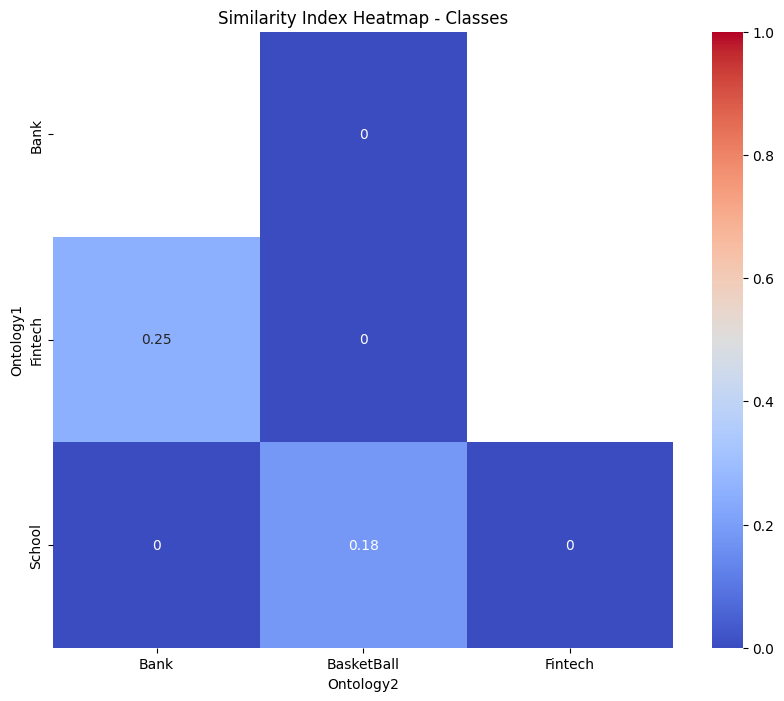

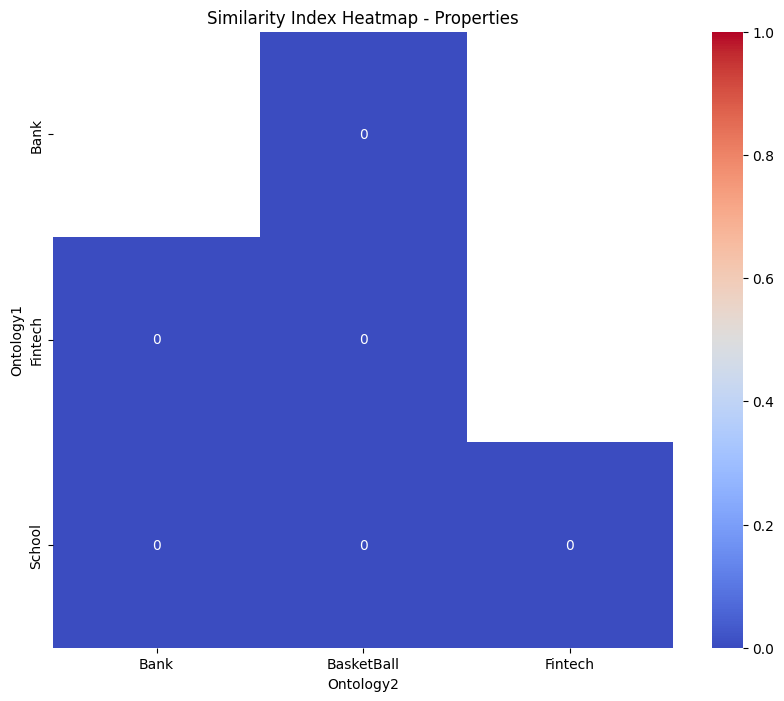

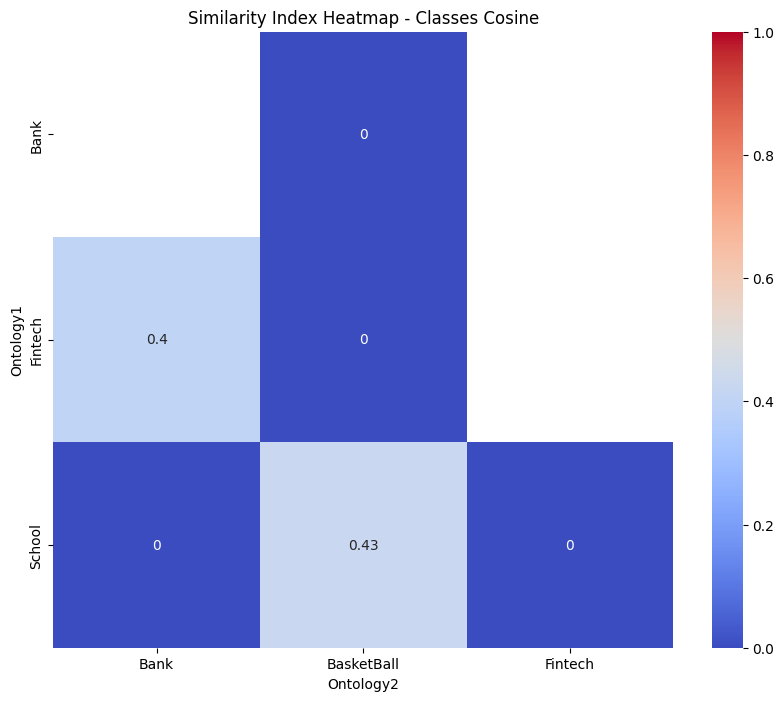

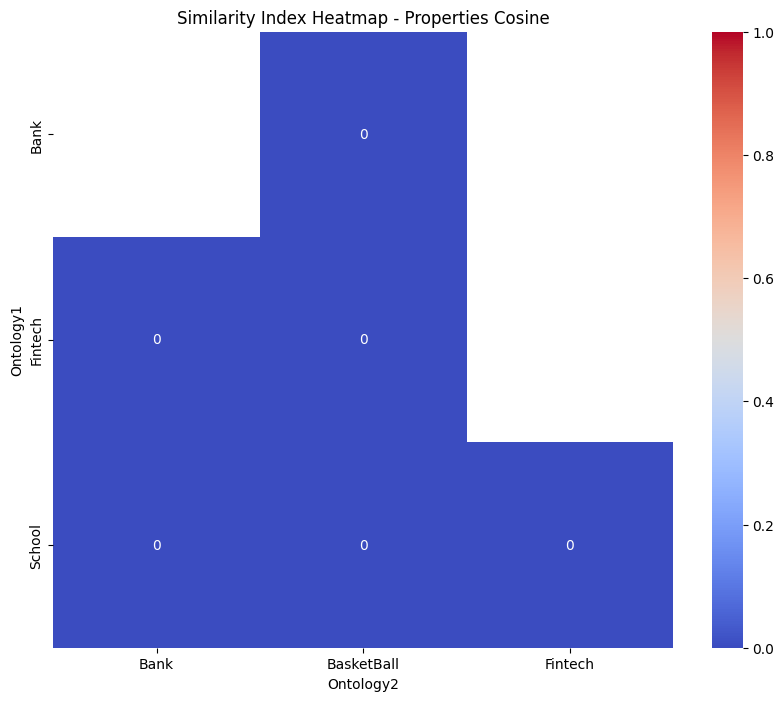

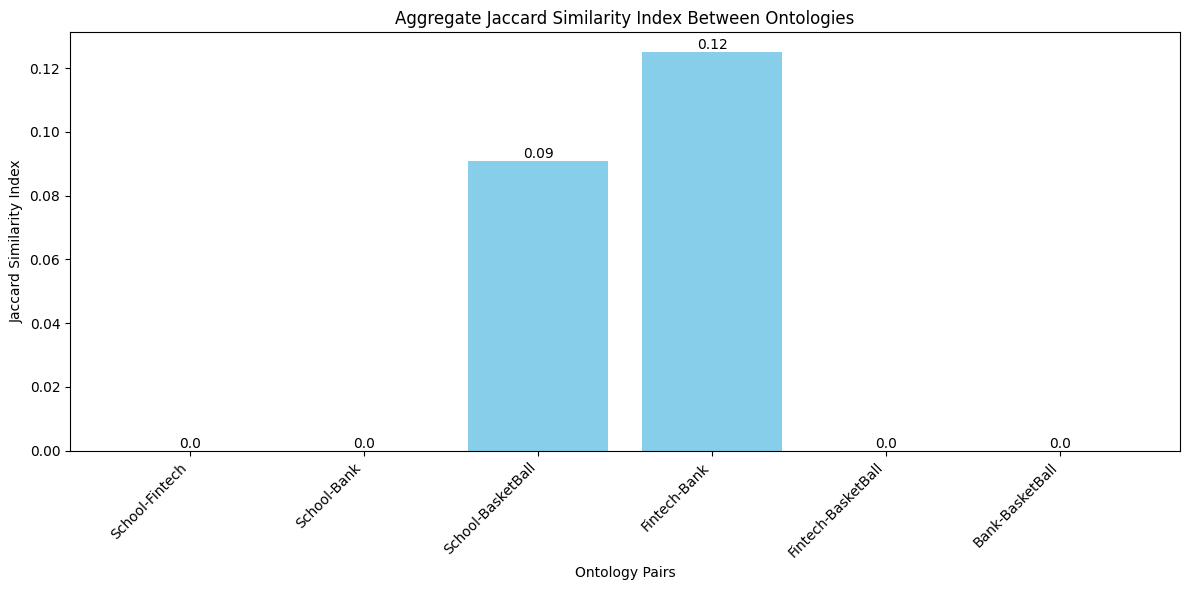

In [36]:
from rdflib import Graph, RDF, RDFS
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Define ontology files
ontology_files = {
    'School': 'school_ontology.rdf',
    'Fintech': 'fintech_ontology.rdf',
    'Bank': 'bank_ontology.rdf',
    'BasketBall': 'basketball_ontology.rdf'
}

# Function to extract classes and properties from ontology
def extract_details(graph):
    classes = set()
    properties = set()

    # Extract classes
    for s, p, o in graph.triples((None, RDF.type, RDFS.Class)):
        class_label = graph.value(s, RDFS.label)
        class_label = class_label if class_label else s
        classes.add(str(class_label))

    # Extract properties
    for s, p, o in graph.triples((None, RDF.type, RDF.Property)):
        prop_label = graph.value(p, RDFS.label)
        prop_label = prop_label if prop_label else p
        properties.add(str(prop_label))

    return classes, properties

# Load and parse the ontologies
def load_ontology(file_path):
    g = Graph()
    g.parse(file_path)
    return extract_details(g)

# Load details for each ontology
ontologies_details = {name: load_ontology(file) for name, file in ontology_files.items()}

# Function to calculate Jaccard Index
def jaccard_index(set1, set2):
    intersection = set1.intersection(set2)
    union = set1.union(set2)
    if not union:
        return 0
    return len(intersection) / len(union)

# Function to calculate Cosine Similarity
def cosine_similarity_vectors(set1, set2):
    all_elements = list(set1.union(set2))
    if not all_elements:  # Avoid division by zero if no elements
        return 0
    vector1 = [1 if elem in set1 else 0 for elem in all_elements]
    vector2 = [1 if elem in set2 else 0 for elem in all_elements]
    if sum(vector1) == 0 or sum(vector2) == 0:
        return 0
    return cosine_similarity([vector1], [vector2])[0][0]

# Calculate Jaccard similarities and Cosine similarities between each pair of ontologies
ontology_names = list(ontologies_details.keys())
similarities = {
    'Classes': {},
    'Properties': {},
    'Aggregate': {},
    'Classes Cosine': {},
    'Properties Cosine': {}
}

for i in range(len(ontology_names)):
    for j in range(i + 1, len(ontology_names)):
        name1 = ontology_names[i]
        name2 = ontology_names[j]

        # Extract classes and properties for each ontology
        classes1, properties1 = ontologies_details[name1]
        classes2, properties2 = ontologies_details[name2]

        # Calculate Jaccard index for classes
        class_similarity = jaccard_index(classes1, classes2)
        similarities['Classes'][f"{name1}-{name2}"] = class_similarity

        # Calculate Jaccard index for properties
        prop_similarity = jaccard_index(properties1, properties2)
        similarities['Properties'][f"{name1}-{name2}"] = prop_similarity

        # Calculate cosine similarity for classes
        class_cosine_similarity = cosine_similarity_vectors(classes1, classes2)
        similarities['Classes Cosine'][f"{name1}-{name2}"] = class_cosine_similarity

        # Calculate cosine similarity for properties
        prop_cosine_similarity = cosine_similarity_vectors(properties1, properties2)
        similarities['Properties Cosine'][f"{name1}-{name2}"] = prop_cosine_similarity

        # Calculate aggregate Jaccard index (average of classes and properties)
        aggregate_similarity = (class_similarity + prop_similarity) / 2
        similarities['Aggregate'][f"{name1}-{name2}"] = aggregate_similarity

# Print Jaccard Similarity Indexes and Cosine Similarities
for category in similarities:
    print(f"\n{category} Similarity Indexes:")
    for pair, similarity in similarities[category].items():
        print(f"{pair}: {similarity:.2f}")

# Prepare data for visualization
def prepare_data_for_viz(similarities):
    data = []
    for category in similarities:
        for pair, similarity in similarities[category].items():
            ont1, ont2 = pair.split('-')
            data.append([ont1, ont2, category, similarity])
    return pd.DataFrame(data, columns=['Ontology1', 'Ontology2', 'Category', 'Similarity Index'])

df = prepare_data_for_viz(similarities)

# Create a pivot table and plot heatmaps for Jaccard and Cosine Similarity
for category in ['Classes', 'Properties', 'Classes Cosine', 'Properties Cosine']:
    pivot_table = df[df['Category'] == category].pivot_table(index='Ontology1', columns='Ontology2', values='Similarity Index')

    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_table, annot=True, cmap='coolwarm', vmin=0, vmax=1)
    plt.title(f'Similarity Index Heatmap - {category}')
    plt.show()

# Plot bar chart for aggregate similarities
plt.figure(figsize=(12, 6))
bars = plt.bar(similarities['Aggregate'].keys(), similarities['Aggregate'].values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Ontology Pairs')
plt.ylabel('Jaccard Similarity Index')
plt.title('Aggregate Jaccard Similarity Index Between Ontologies')

# Adding value labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()
